In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
#dataset_path = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/train.txt'

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/gdrive/MyDrive/SoftCom Lab/Dataset/'
stopwords_list = path+'bangla_stopwords.txt'

In [ ]:
dataset_path = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/train2.txt'

data = pd.read_csv(dataset_path, sep='\t', header=None, names=['Tag', 'Comment'])

data.head(10)

NameError: name 'pd' is not defined

In [ ]:
print("Total Texts:",len(data),
      "\nTotal Angry Texts:",len(data[data.Tag =='angry']),
      "\nTotal Sad Texts:",len(data[data.Tag=='sad']),
      "\nTotal Happy Texts:",len(data[data.Tag =='happy']),
      "\nTotal Disgust Texts:",len(data[data.Tag =='disgust']),
      "\nTotal Surprise Texts:",len(data[data.Tag =='surprise']),
      "\nTotal Fear Texts:",len(data[data.Tag =='fear']))


Total Texts: 5640 
Total Angry Texts: 1200 
Total Sad Texts: 1200 
Total Happy Texts: 1800 
Total Disgust Texts: 600 
Total Surprise Texts: 480 
Total Fear Texts: 360


In [ ]:
data.columns

Index(['Tag', 'Comment'], dtype='object')

In [ ]:
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Comment[i],'\n','Emotion:-- ',data.Tag[i],'\n')

 কেয়ামতের মাঠে তোমাদের ছাড়া নট। 
 Emotion:--  fear 

 কোথা হতে এল পহেলা বৈশাখ? 
 Emotion:--  surprise 

 টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে ! 
 Emotion:--  angry 

 নাস্তিকদের দালাল একাওর টিভি বন্ধ করা হোক,https://www.facebook.com/events/510113745860941 
 Emotion:--  angry 

 প্রতিটি দেশের সেনা-বাহিনী তাদের দেশের গৌরব, অহংকার । তেমনি আমার দেশের সেনা বাহিনীও আমাদের গৌরব, অহংকার, এবং জাতীয় মর্যাদার প্রতিক । কুমিল্লা ভিক্টোরিয়া কলেজ ও বিশ্ববিদ্যালয় এর ইতিহাস বিভাগের ছাত্রী হত্যায়, স্থানটি সত্যি ..!!! এটা আমাদের জাতীয় মর্যাদা ও অহংকারে আঘাত স্বরূপ । এই দৃষ্টতা যে/যারা দেখিয়েছে ওদের, আকাশ ফেরে, মাটি খুড়ে বের করতে হবে । একে একে আমাদের জাতীয় মর্যাদায় আঘাত করা হয়েছে, স্বচ্ছতায় মর্যাদায় গৌরবে অবশিষ্ট শুধু আমাদের “বাংলাদেশ সেনা বাহিনী” এদের বিতর্কীত করার চক্রান্তও হতে পারে । তাই এই বিভৎস ন্যাক্কারজনক ঘটনায় জড়িত ব্যক্তি / ব্যক্তিদের ধরে, সেনা আইনে বিচার করে, বাংলাদেশ সেনা বাহিনীর মর্যাদা অক্ষুন্ন রাখতে হবে এবং প্রমান করে যেতে হবে, “বাংলাদেশ সেনা বাহিনী” দেশ মা মাটি সার্বিক সুরক্ষার জন্যে’ই এ

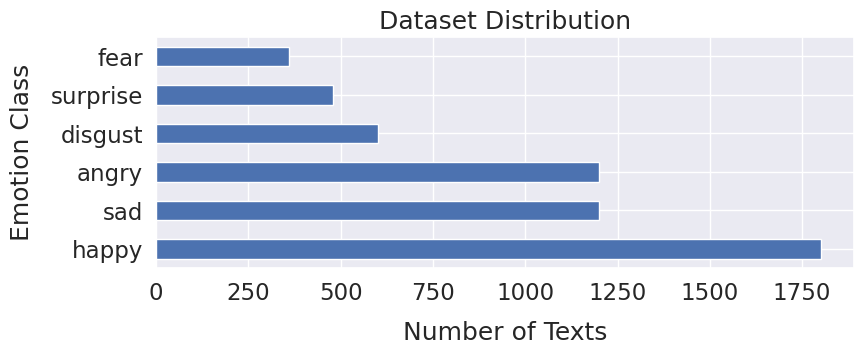

In [ ]:
sns.set(font_scale=1.5)
data['Tag'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Texts", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.title("Dataset Distribution", y=1);

In [ ]:
# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [ ]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)

# print some cleaned reviews from the dataset
sample_data = [10,100,25,854,966,1500,1589,1700,2000,2500,4000,4500]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')


Original:
  কেয়ামতের মাঠে তোমাদের ছাড়া নট। 
Cleaned:
  কেয়ামতের মাঠে তোমাদের ছাড়া নট  
 Sentiment:--  fear 

Original:
  কোথা হতে এল পহেলা বৈশাখ? 
Cleaned:
  কোথা হতে এল পহেলা বৈশাখ  
 Sentiment:--  surprise 

Original:
  এইখানেও পাকিস্তানের অস্তিত্ব খুজে পেয়েছে হিন্দুস্থানের দালাল রা। এরা দেশের দুরন্ত দুশমন 
Cleaned:
  এইখানেও পাকিস্তানের অস্তিত্ব খুজে পেয়েছে হিন্দুস্থানের দালাল রা  এরা দেশের দুরন্ত দুশমন 
 Sentiment:--  disgust 

Original:
  আনেকের হয়নি | আবার বেশির ভাগেই হাতে পায়নি | তারা.... 
Cleaned:
  আনেকের হয়নি   আবার বেশির ভাগেই হাতে পায়নি   তারা     
 Sentiment:--  sad 

Original:
  আশা করি পরিবর্তন হবে। 
Cleaned:
  আশা করি পরিবর্তন হবে  
 Sentiment:--  happy 

Original:
  শাহজালালের সিকুরিটিরা প্রমাণ করলো সব চুরির পেছনে তাদের হাত আছে... 
Cleaned:
  শাহজালালের সিকুরিটিরা প্রমাণ করলো সব চুরির পেছনে তাদের হাত আছে    
 Sentiment:--  disgust 

Original:
  কথায় বলে ঠেলার নাম বাবাজী 
Cleaned:
  কথায় বলে ঠেলার নাম বাবাজী 
 Sentiment:--  angry 

Original:
  এভাবে হাত জোড় করে উনারা 

In [ ]:
# Length of each Comments
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the Comments with least words
dataset = data.loc[data.length>1]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 144 Small Reviews 
Total Reviews: 5496


In [ ]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  happy
Number of Documents:1691
Number of Words:22279
Number of Unique Words:5643
Most Frequent Words:

ধন্যবাদ	341
না	240
ভাই	230
এই	225
আপনার	201
আপনাদের	200
জন্য	192
করে	165
ভাল	164
পুলিশ	156

Class Name :  sad
Number of Documents:1194
Number of Words:25742
Number of Unique Words:6592
Most Frequent Words:

না	502
কি	270
করে	250
এই	236
আর	181
ও	170
হয়	144
আমরা	132
কোন	130
এর	121

Class Name :  angry
Number of Documents:1186
Number of Words:16870
Number of Unique Words:5457
Most Frequent Words:

না	267
কি	189
এই	183
করে	177
আর	123
করা	107
যে	100
ইমরান	98
হবে	92
তো	82

Class Name :  disgust
Number of Documents:589
Number of Words:10344
Number of Unique Words:3697
Most Frequent Words:

না	210
কি	139
করে	103
আর	85
যে	71
হয়	69
এই	69
তো	65
আপনার	60
কে	54

Class Name :  surprise
Number of Documents:476
Number of Words:8891
Number of Unique Words:3431
Most Frequent Words:

কি	167
না	160
করে	88
এই	67
আর	59
আছে	57
আমার	54
হয়	52
কেন	49
ও	49

Class Name :  fear
Number of Documents:

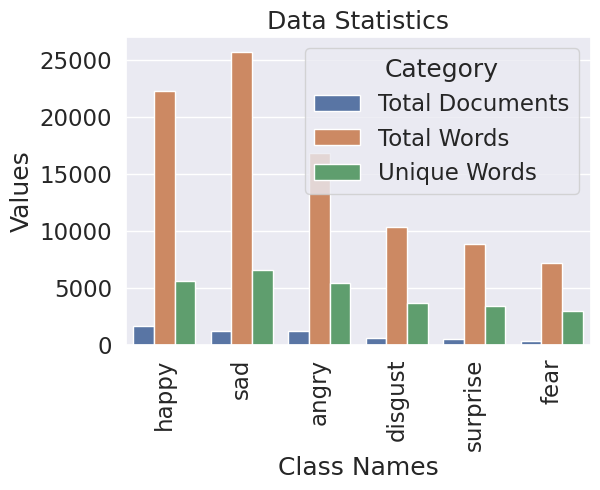

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=90);

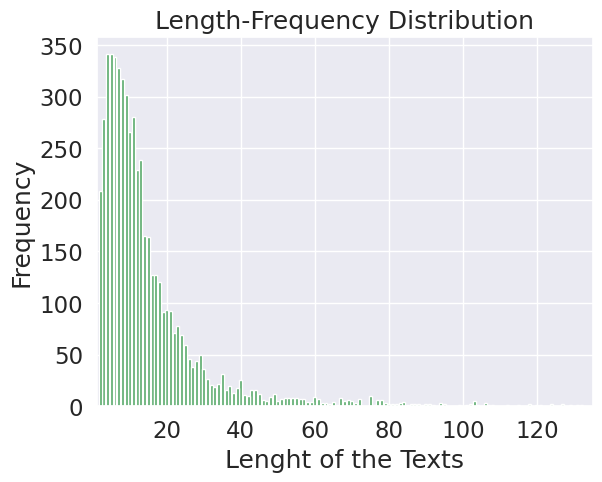

Maximum Length of a Comment: 479
Minimum Length of a Comment: 2
Average Length of a Comment: 17.0


In [ ]:
# Calculate the Comment of each of the Comment
dataset['CommentLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.CommentLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="g")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(dataset.CommentLength)}")
print(f"Minimum Length of a Comment: {min(dataset.CommentLength)}")
print(f"Average Length of a Comment: {round(np.mean(dataset.CommentLength),0)}")

In [ ]:
'''happy = dataset[dataset.Tag == 'happy']
sad = dataset[dataset.Tag == 'sad']
disgust = dataset[dataset.Tag == 'disgust']
fear = dataset[dataset.Tag == 'fear']
surprise = dataset[dataset.Tag == 'surprise']
angry = dataset[dataset.Tag == 'angry']
dataset = happy.append(sad,ignore_index=True)
dataset.Tag.value_counts()'''

<ipython-input-41-1fba0f74ce20>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = happy.append(sad,ignore_index=True)


happy    1435
sad       996
Name: Tag, dtype: int64

In [ ]:
#Label Encoding Function

def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

#Dataset Splitting Function

def dataset_split(feature_space,sentiment):


    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))


In [ ]:
# Unigram Tf-idf value calculation

def calc_gram_tfidf(comments,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(comments)

    return tfidf,X

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
#  Classifiers Defination

def ml_models_defination():

    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names

# Model Evaluation Function

def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average='weighted'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average='weighted'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='weighted'),4)*100

    return my_dict

#Model Performane into Dataframe

def performance_table(performance_dict):


    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [ ]:
# save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 15736

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5496 
	Training		 4946 
	Test			 550


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

Feature Size :======> 77384

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5496 
	Training		 4946 
	Test			 550


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parame

Feature Size :======> 147927

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5496 
	Training		 4946 
	Test			 550


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")



========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     52.18      46.31   52.18     46.39          LR
1     36.55      34.82   36.55     35.49          DT
2     49.64      44.69   49.64     44.39          RF
3     51.64      48.04   51.64     46.25         MNB
4     44.55      41.10   44.55     42.11         KNN
5     47.09      40.05   47.09     40.29  Linear SVM
6     50.00      39.77   50.00     43.22     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 52.18000000000001
Highest F1-Score achieved by LR at = 46.39
Highest Precision Score achieved by MNB at = 48.04
Highest Recall Score achieved by LR at = 52.18000000000001

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     51.27      45.59   51.27     44.46          LR
1     37.64      36.13   37.64     36.64          DT
2     46.91      44.38   46.91     41.60      

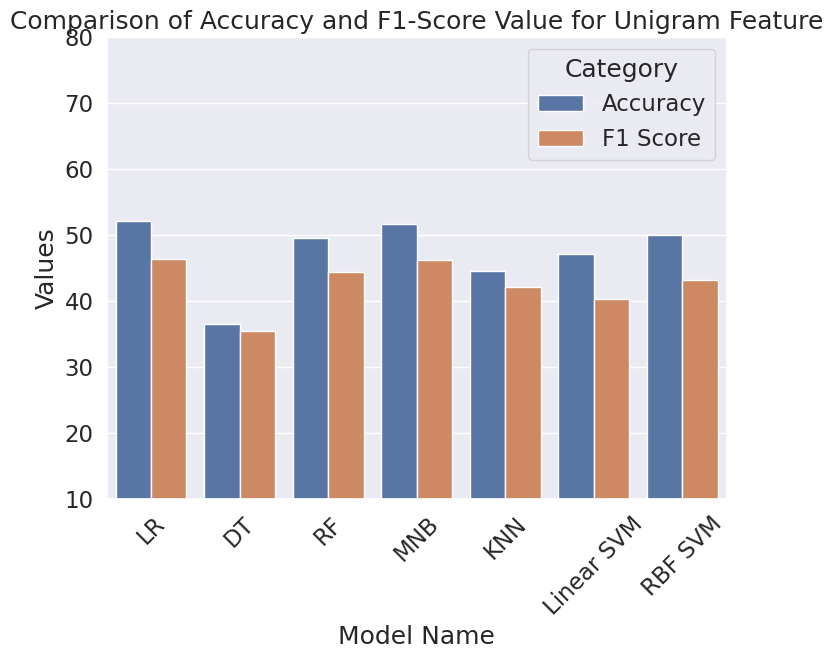

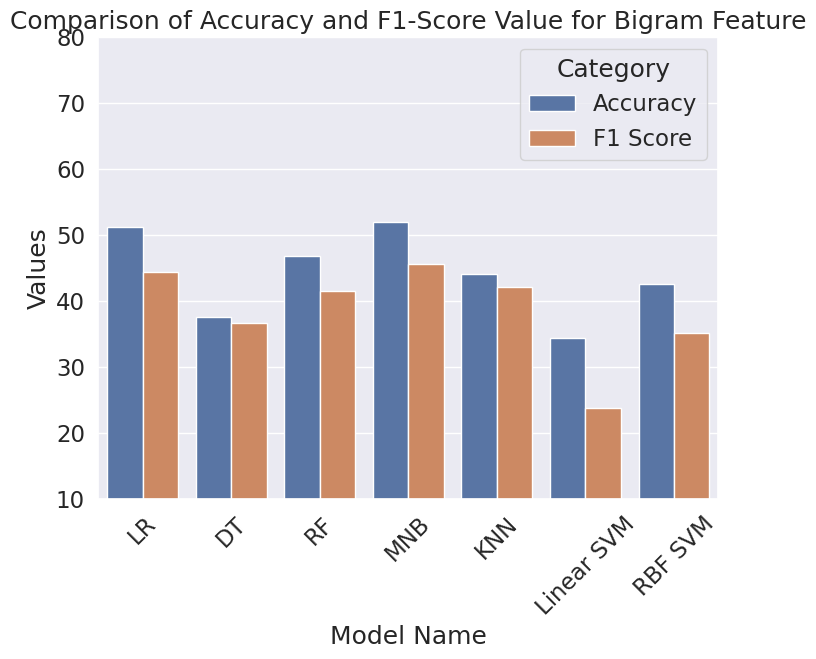

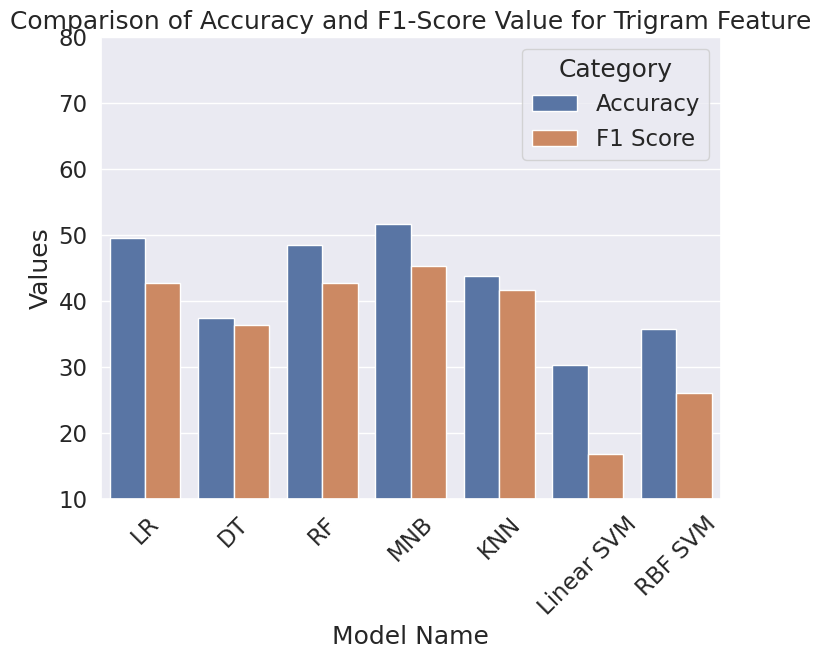

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
